# Modeling salt emission for ngVLA

Index


## Index

* [NaCl LTE](#NaCl-LTE-models)
* [KCl LTE](#KCl-LTE)
* [SiS LTE](#SiS-LTE)
* [PN LTE](#PN-LTE)

In [1]:
pwd

'/orange/adamginsburg/salt/notebooks'

In [2]:
mkdir ngvla

mkdir: cannot create directory ‘ngvla’: File exists


In [3]:
%matplotlib widget
import pylab as pl
import numpy as np

In [4]:
import pyspeckit

In [5]:
%matplotlib inline

In [6]:
import sys
sys.path.append('/orange/adamginsburg/salt/Orion_ALMA_2016.1.00165.S/analysis/')
import imp
import kcl_rotation_diagram
imp.reload(kcl_rotation_diagram)

<module 'kcl_rotation_diagram' from '/orange/adamginsburg/salt/Orion_ALMA_2016.1.00165.S/analysis/kcl_rotation_diagram.py'>

In [7]:
import pyradex
import pylab as pl
import numpy as np
import paths
import dust_emissivity
from astropy import units as u
from astropy.table import Table
from kcl_rotation_diagram import fit_tex
#from astroquery.vamdc import Vamdc
from pyspeckit.spectrum.models.lte_molecule import get_molecular_parameters
from radex_modeling import chi2, GOF_plot, fitmod
pl.rcParams['figure.facecolor'] = 'w'
pl.rcParams['font.size'] = 16


Using a default ortho-to-para ratio (which will only affect species for which independent ortho & para collision rates are given)
invalid value encountered in true_divide


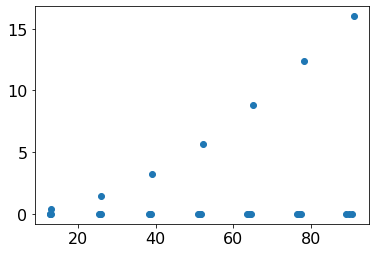

In [8]:
rr = pyradex.Radex(species='nacl', temperature=200, density=1e8, column=4e13)
rslt = rr()
ngvlasel = (rslt['frequency'] > 5) & (rslt['frequency'] < 100)
pl.scatter(rslt['frequency'][ngvlasel], rslt['T_B'][ngvlasel])

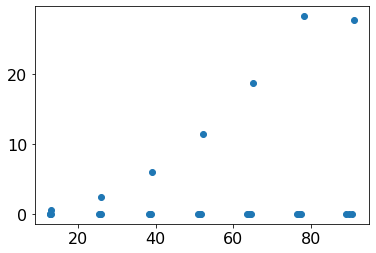

In [9]:
rr = pyradex.Radex(species='nacl', temperature=200, density=1e6, column=4e13)
rslt = rr()
ngvlasel = (rslt['frequency'] > 5) & (rslt['frequency'] < 100)
pl.scatter(rslt['frequency'][ngvlasel], rslt['T_B'][ngvlasel])

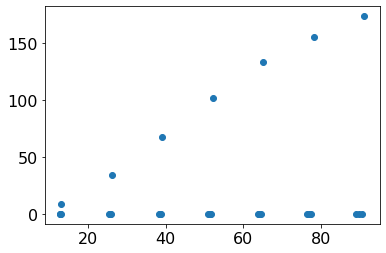

In [10]:
rr = pyradex.Radex(species='nacl', temperature=200, density=5e7, column=1e15)
rslt = rr()
ngvlasel = (rslt['frequency'] > 5) & (rslt['frequency'] < 100)
pl.scatter(rslt['frequency'][ngvlasel], rslt['T_B'][ngvlasel])

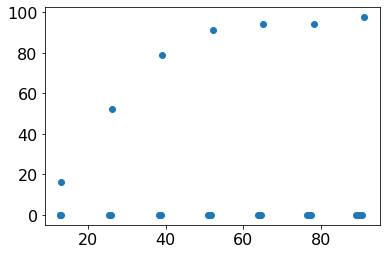

In [11]:
rr = pyradex.Radex(species='nacl', temperature=100, density=5e7, column=1e15)
rslt = rr()
ngvlasel = (rslt['frequency'] > 5) & (rslt['frequency'] < 100)
pl.scatter(rslt['frequency'][ngvlasel], rslt['T_B'][ngvlasel])

In [12]:
rr = pyradex.Radex(species='nacl', temperature=100, density=5e7, column=1e15)
tbl = rr()

In [34]:
tbl

Tex,tau,FREQ,upperstateenergy,upperlevel,lowerlevel,upperlevelpop,lowerlevelpop,brightness,T_B
K,,GHz,K,,,,,erg / (cm2 Hz s sr),K
float64,float64,float64,float64,bytes6,bytes6,float64,float64,float64,float64
35.87124529042873,2.6146421662954434e-14,12.737511,1544.5,3_1,3_0,4.590527167710757e-16,1.5564759330363816e-16,4.3264090270714866e-29,8.67933716080418e-13
27.622219796844778,6.802621166060498e-11,12.833077,1034.9,2_1,2_0,9.310783655084985e-13,3.1735726145348527e-13,8.563780309846809e-26,1.692513124018496e-09
-78.43694230185484,-1.0372648133527214e-07,12.929261,520.3,1_1,1_0,4.094253575600278e-09,1.3539973457514844e-09,4.324751421014958e-22,8.420577406306354e-06
116.78735284615078,0.17205259092545172,13.026062,0.6,0_1,0_0,0.009392863115198675,0.003147081214661699,8.656480553249266e-16,16.605165303718902
73.58127243868279,5.182683714309562e-14,25.474799,1545.7,3_2,3_1,7.527115899950975e-16,4.590527167710757e-16,7.051923454610082e-28,3.5368299946189962e-12
42.52061104326735,1.8082932830756386e-10,25.665931,1036.1,2_2,2_1,1.5086151533041476e-12,9.310783655084985e-13,1.3806205252337685e-24,6.82163390265776e-09
67.5230918323706,5.110879055679331e-07,25.858298,521.5,1_2,1_1,6.703557156709851e-09,4.094253575600278e-09,6.356543331162585e-21,3.094206307715034e-05
104.19365745991583,0.6589969979605437,26.0519,1.9,0_2,0_1,0.015460663862975387,0.009392863115198675,1.1033595869043614e-14,52.91348857863377


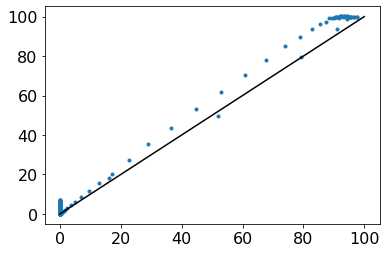

In [13]:
pl.plot(tbl['T_B'], tbl['Tex'] * (1-np.exp(-tbl['tau'])), '.')
pl.plot([0,100], [0,100], 'k')

In [14]:
from pyspeckit.spectrum.models import lte_molecule
from pyspeckit.spectrum.models.lte_molecule import get_molecular_parameters, get_molecular_parameters, generate_model, generate_fitter
from pyspeckit.spectrum.models.inherited_gaussfitter import gaussian

In [15]:
from astropy import constants

In [16]:
molecule_fullname = 'nacl'
vcen=0*u.km/u.s
vwidth=5*u.km/u.s
tkin=tex=100
density=1e7
Ntot=1e15
rr = pyradex.Radex(species=molecule_fullname, temperature=tkin, density=density, column=Ntot)
tbl = rr()
tbl.rename_column('frequency', 'FREQ')
v0tbl = tbl[np.array([x[0]=='0' for x in tbl['upperlevel']])]
def modfunc(xarr, vcen, width, tex, column, density=density, **kwargs):

    rr = pyradex.Radex(species=molecule_fullname, temperature=tex, density=density, column=column)
    tbl = rr()
    tbl.rename_column('frequency', 'FREQ')
    v0tbl = tbl[np.array([x[0]=='0' for x in tbl['upperlevel']])]

    mod = np.zeros(xarr.shape)
    for freq, tb in zip(v0tbl['FREQ'].quantity, v0tbl['T_B'].quantity):
        nucen = freq*(1-vcen/constants.c)
        nuwidth = width * freq / constants.c
        mod += gaussian(xarr.to(u.GHz).value, tb.to(u.K).value, nucen.to(u.GHz).value, nuwidth.to(u.GHz).value)
    return u.Quantity(mod, u.K)
modfunc(v0tbl['FREQ'].quantity, vcen, vwidth, tkin, Ntot, density=density)

Using a default ortho-to-para ratio (which will only affect species for which independent ortho & para collision rates are given)
invalid value encountered in true_divide


<Quantity [1.66051653e+01, 5.29134886e+01, 7.94250616e+01, 9.09812500e+01,
           9.40558457e+01, 9.44803657e+01, 9.72035902e+01, 9.63827995e+01,
           9.56895219e+01, 9.67744009e+01, 9.62668122e+01, 9.56177942e+01,
           9.49867586e+01, 9.47082286e+01, 9.53202465e+01, 9.48289643e+01,
           9.45760067e+01, 9.47735510e+01, 9.35949708e+01, 9.38581950e+01,
           9.36322182e+01, 9.39945646e+01, 9.25667199e+01, 9.28404334e+01,
           9.24610511e+01, 9.16831410e+01, 9.02917781e+01, 8.96006538e+01,
           8.91898805e+01, 8.82164563e+01, 8.68395675e+01, 8.50686595e+01,
           8.24938602e+01, 7.90703781e+01, 7.49376123e+01, 6.95927731e+01,
           6.33229441e+01, 5.60826674e+01, 4.80283953e+01, 3.96771005e+01,
           3.14264284e+01, 2.38817530e+01, 1.75913795e+01, 1.26959370e+01,
           9.09351934e+00, 6.47985333e+00, 4.58024766e+00, 3.23887334e+00,
           2.27454695e+00, 1.58264088e+00, 1.08192710e+00, 7.44168006e-01,
           5.07556291e-01

# SLED plot

In [35]:
def sledplot(molecule_fullname, molecule_shortname, Ntot=1e14, tkins=[15,50,150,1000], fmin=5*u.GHz, fmax=500*u.GHz, LTE=True,
             density=None, fymin=None, fymax=None):
    if LTE:
        Cfreqs, Caij, Cdeg, CEU, Cpartfunc = get_molecular_parameters(molecule_fullname,
                                                             catalog='CDMS',
                                                             fmin=fmin,
                                                             fmax=fmax)
        def modfunc(xarr, vcen, width, tex, column, **kwargs):
            model = generate_model(xarr, vcen, width, tex, 
                           column=column, freqs=Cfreqs, aij=Caij, deg=Cdeg, EU=CEU, partfunc=Cpartfunc)*u.K
            return model

        tbl = CDMS.query_lines(fmin, fmax, molecule=molecule_fullname, parse_name_locally=True)
        tbl.sort('FREQ')
        tbl.add_index('Ku')
        v0tbl = tbl.loc[0]
        v0tbl.sort('FREQ')
    else:
        rr = pyradex.Radex(species=molecule_fullname, temperature=tkins[0], density=density, column=Ntot)
        tbl = rr()
        tbl.rename_column('frequency', 'FREQ')
        Ju = np.array([int(x[0]) for x in tbl['upperlevel']])
        tbl['Ju'] = Ju
        v0tbl = tbl[Ju == 0]
        def modfunc(xarr, vcen, width, tex, column, **kwargs):
            
            rr = pyradex.Radex(species=molecule_fullname, temperature=tex, density=density, column=column)
            tbl = rr()
            tbl.rename_column('frequency', 'FREQ')
            Ju = np.array([int(x[0]) for x in tbl['upperlevel']])
            tbl['Ju'] = Ju
            
            v0tbl = tbl[Ju==0]

            mod = np.zeros(xarr.shape)
            for freq, tb in zip(v0tbl['FREQ'].quantity, v0tbl['T_B'].quantity):
                nucen = freq*(1-vcen/constants.c)
                nuwidth = width * freq / constants.c
                mod += gaussian(xarr.to(u.GHz).value, tb.to(u.K).value, nucen.to(u.GHz).value, nuwidth.to(u.GHz).value)
            return u.Quantity(mod, u.K)


    Ntotstr = f"{Ntot:0.0e}".replace("+","")
    densitystr = f" n={density:0.0e}cm$^{{-3}}$".replace("+","") if density is not None else ""

    Ntot = u.Quantity(Ntot, u.cm**-2)
    fig = pl.figure(figsize=(12,6))
    ax = fig.gca()
    colors = iter(pl.rcParams['axes.prop_cycle'])
    ymin,ymax = 0,0
    for tkin in tkins*u.K:
        cfrq = row['FREQ']

        vcen = 0*u.km/u.s
        vwidth = 5*u.km/u.s
        #tkin = 150*u.K
        mod = modfunc(v0tbl['FREQ'].quantity, vcen, vwidth, tkin, Ntot, )
        #print(mod)
        color = next(colors)['color']
        ax.plot(v0tbl['FREQ'].quantity.to(u.GHz).value, mod, '.', color=color, label=f"T$_{{rot}}$={tkin}")
        ax.plot(v0tbl['FREQ'].quantity.to(u.GHz).value, mod, ':', color=color)#, label=f"T$_{{rot}}$={tkin}")
        #ax.vlines(v0tbl['Ju'], mod*0, mod, color=color)

        #ax.set_title(f"J={row['Ju']}-{row['Jl']}")
        #ax.set_xlabel("")
        #ax.set_ylabel("")
        #pl.xticks(rotation=35)
        #pl.setp(ax.get_xticklabels(), rotation=35)#, ha="right", rotation_mode="anchor")
        ymin = max([min([ymin, ax.get_ylim()[0]]), 0])
        ymax = min([max([ymax, ax.get_ylim()[1]]), tkin.value])
        
    pl.legend(loc='upper left')
    ax.set_title(f"{molecule_shortname} v=0   N={Ntotstr} cm$^{{-2}}${densitystr}", )#pad=30)
    #ax.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    ax.set_xlabel("Frequency [GHz]")#.set_xlabel("Upper state rotation number $J_U$", )
    ax.set_ylabel("Brightness Temperature [K]")

    if fymin is not None:
        ymin = fymin
    if fymax is not None:
        ymax = fymax
    
    pl.tight_layout()
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(0.5, 350)
    #xax = ax.twiny()
    #xax.set_xlim(np.array(ax.get_xlim()) * kclv0tbl['FREQ'].quantity.to(u.GHz)[0].value)
    #xax.set_xlabel("Frequency [GHz]")
    
    LTEstr = "LTE" if LTE else "nLTE"
    densitystr = f"_n={density:0.0e}".replace("+","") if density is not None else ""

    
    pl.savefig(f"ngvla/{molecule_shortname}_{LTEstr}_SLEDs_N={Ntotstr}{densitystr.replace(' ','_')}.png", dpi=300)
    
    max_ngvla_Ju = max(v0tbl['Ju'][v0tbl['FREQ'] < 120*u.GHz])
    min_alma_Ju = min(v0tbl['Ju'][v0tbl['FREQ'] > 84*u.GHz])
    
    
    #ax.fill_between([0.5, max_ngvla_Ju + 0.5], -10, 1007, alpha=0.15, zorder=-5, color='purple')
    ax.fill_between([1,120], -10, 1007, alpha=0.15, zorder=-5, color='purple')
    ax.text(0.04,0.5,'ngVLA', color='purple', transform=ax.transAxes)
    #ax.fill_between([min_alma_Ju - 0.5, 100.5], -10, 1007, alpha=0.05, zorder=-6, color='cyan')
    ax.fill_between([84, 400], -10, 1007, alpha=0.05, zorder=-6, color='cyan')
    ax.text(0.8,0.5,'ALMA', color='blue', transform=ax.transAxes)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(0.5, 350)
  
    pl.savefig(f"ngvla/{molecule_shortname}_{LTEstr}_SLEDs_N={Ntotstr}{densitystr}_labeled.png", dpi=300)

# NaCl LTE models

In [36]:
from pyspeckit.spectrum.models import lte_molecule
from pyspeckit.spectrum.models.lte_molecule import get_molecular_parameters, get_molecular_parameters, generate_model, generate_fitter

In [37]:
Cfreqs, Caij, Cdeg, CEU, Cpartfunc = get_molecular_parameters('NaCl, v=0-15',
                                                         catalog='CDMS',
                                                         fmin=5*u.GHz,
                                                         fmax=500*u.GHz)
def modfunc_nacl_CDMS(xarr, vcen, width, tex, column, **kwargs):
    model = generate_model(xarr, vcen, width, tex, 
                   column=column, freqs=Cfreqs, aij=Caij, deg=Cdeg, EU=CEU, partfunc=Cpartfunc)*u.K
    return model

In [38]:
from astroquery.linelists.cdms import CDMS

In [39]:
[x for x in CDMS.get_species_table()['NAME'] if 'nacl' in x.lower()]

['NaCl, v=0-15', 'NaCl-36, v=0-5', 'NaCl-37, v=0-15']

In [40]:
CDMS.query_lines(10*u.GHz, 20*u.GHz, molecule='NaCl, v=0-15', parse_name_locally=True)

FREQ,ERR,LGINT,DR,ELO,GUP,MOLWT,TAG,QNFMT,Ju,Ku,vu,F1u,F2u,F3u,Jl,Kl,vl,F1l,F2l,F3l,name,Lab
MHz,MHz,MHz nm2,,1 / cm,,u,,,,,,,,,,,,,,,,
float64,float64,float64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str12,bool
11638.7653,0.0253,-14.669,2,5065.3507,3,58,5021,202,1,15,--,--,--,--,0,15,--,--,--,--,"NaCl, v=0-15",False
11726.9448,0.0197,-14.012,2,4750.1226,3,58,5021,202,1,14,--,--,--,--,0,14,--,--,--,--,"NaCl, v=0-15",False
11815.7383,0.0149,-13.348,2,4431.8237,3,58,5021,202,1,13,--,--,--,--,0,13,--,--,--,--,"NaCl, v=0-15",False
11905.1464,0.011,-12.678,2,4110.4232,3,58,5021,202,1,12,--,--,--,--,0,12,--,--,--,--,"NaCl, v=0-15",False
11995.1691,0.0078,-12.001,2,3785.8899,3,58,5021,202,1,11,--,--,--,--,0,11,--,--,--,--,"NaCl, v=0-15",False
12085.8067,0.0053,-11.318,2,3458.1925,3,58,5021,202,1,10,--,--,--,--,0,10,--,--,--,--,"NaCl, v=0-15",False
12177.0596,0.0034,-10.628,2,3127.299,3,58,5021,202,1,9,--,--,--,--,0,9,--,--,--,--,"NaCl, v=0-15",False
12268.9279,0.002,-9.9314,2,2793.1773,3,58,5021,202,1,8,--,--,--,--,0,8,--,--,--,--,"NaCl, v=0-15",False


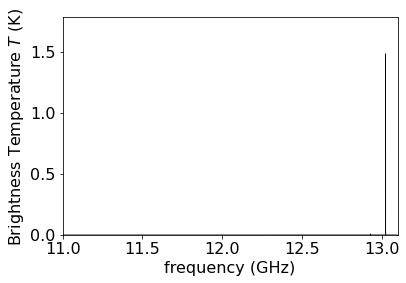

In [41]:
xarr = np.linspace(10e3,90e3,100)*u.MHz
xarr = np.linspace(11,13.1,10000)*u.GHz
vcen = 0*u.km/u.s
vwidth = 5*u.km/u.s
tkin = 100*u.K
Ntot = 1e15*u.cm**-2
modelcdms = pyspeckit.Spectrum(xarr=xarr, data=modfunc_nacl_CDMS(xarr, vcen, vwidth, tkin, Ntot, ))
modelcdms.plotter()

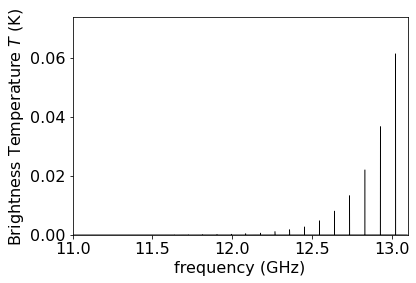

In [42]:
xarr = np.linspace(10e3,90e3,100)*u.MHz
xarr = np.linspace(11,13.1,10000)*u.GHz
vcen = 0*u.km/u.s
vwidth = 5*u.km/u.s
tkin = 1000*u.K
Ntot = 1e15*u.cm**-2
modelcdms = pyspeckit.Spectrum(xarr=xarr, data=modfunc_nacl_CDMS(xarr, vcen, vwidth, tkin, Ntot, ))
modelcdms.plotter()

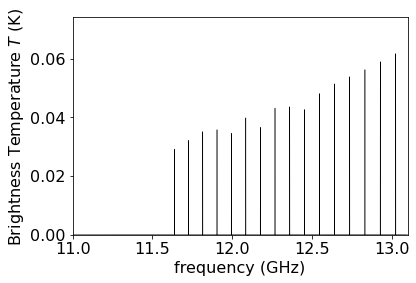

In [43]:
xarr = np.linspace(10e3,90e3,100)*u.MHz
xarr = np.linspace(11,13.1,10000)*u.GHz
vcen = 0*u.km/u.s
vwidth = 5*u.km/u.s
tkin = 10000*u.K
Ntot = 1e15*u.cm**-2
modelcdms = pyspeckit.Spectrum(xarr=xarr, data=modfunc_nacl_CDMS(xarr, vcen, vwidth, tkin, Ntot, ))
modelcdms.plotter()

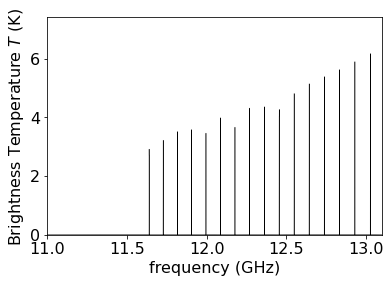

In [44]:
xarr = np.linspace(10e3,90e3,100)*u.MHz
xarr = np.linspace(11,13.1,10000)*u.GHz
vcen = 0*u.km/u.s
vwidth = 5*u.km/u.s
tkin = 10000*u.K
Ntot = 1e17*u.cm**-2
modelcdms = pyspeckit.Spectrum(xarr=xarr, data=modfunc_nacl_CDMS(xarr, vcen, vwidth, tkin, Ntot, ))
modelcdms.plotter()

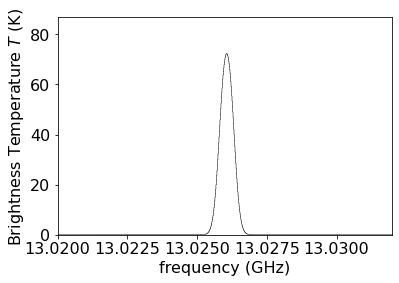

In [45]:
xarr = np.linspace(10e3,90e3,100)*u.MHz
xarr = np.linspace(13.02,13.032,1000)*u.GHz
vcen = 0*u.km/u.s
vwidth = 5*u.km/u.s
tkin = 150*u.K
Ntot = 1e17*u.cm**-2
modelcdms = pyspeckit.Spectrum(xarr=xarr, data=modfunc_nacl_CDMS(xarr, vcen, vwidth, tkin, Ntot, ))
modelcdms.plotter()

In [46]:
nacltbl = CDMS.query_lines(10*u.GHz, 350*u.GHz, molecule='NaCl, v=0-15', parse_name_locally=True)
nacltbl.sort('FREQ')
nacltbl.add_index('Ku')
naclv0tbl = nacltbl.loc[0]
naclv0tbl.sort('FREQ')
naclv0tbl

FREQ,ERR,LGINT,DR,ELO,GUP,MOLWT,TAG,QNFMT,Ju,Ku,vu,F1u,F2u,F3u,Jl,Kl,vl,F1l,F2l,F3l,name,Lab
MHz,MHz,MHz nm2,,1 / cm,,u,,,,,,,,,,,,,,,,
float64,float64,float64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str12,bool
13026.0623,0.0001,-4.108,2,0.0,3,58,5021,202,1,0,--,--,--,--,0,0,--,--,--,--,"NaCl, v=0-15",False
26051.9004,0.0003,-3.2062,2,0.4345,5,58,5021,202,2,0,--,--,--,--,1,0,--,--,--,--,"NaCl, v=0-15",False
39077.2903,0.0004,-2.6802,2,1.3035,7,58,5021,202,3,0,--,--,--,--,2,0,--,--,--,--,"NaCl, v=0-15",False
52102.0077,0.0006,-2.3086,2,2.607,9,58,5021,202,4,0,--,--,--,--,3,0,--,--,--,--,"NaCl, v=0-15",False
65125.8285,0.0007,-2.022,2,4.3449,11,58,5021,202,5,0,--,--,--,--,4,0,--,--,--,--,"NaCl, v=0-15",False
78148.5286,0.0009,-1.7894,2,6.5173,13,58,5021,202,6,0,--,--,--,--,5,0,--,--,--,--,"NaCl, v=0-15",False
91169.8838,0.001,-1.5945,2,9.124,15,58,5021,202,7,0,--,--,--,--,6,0,--,--,--,--,"NaCl, v=0-15",False
104189.67,0.0012,-1.4274,2,12.1651,17,58,5021,202,8,0,--,--,--,--,7,0,--,--,--,--,"NaCl, v=0-15",False


In [47]:
import warnings
warnings.filterwarnings('ignore')

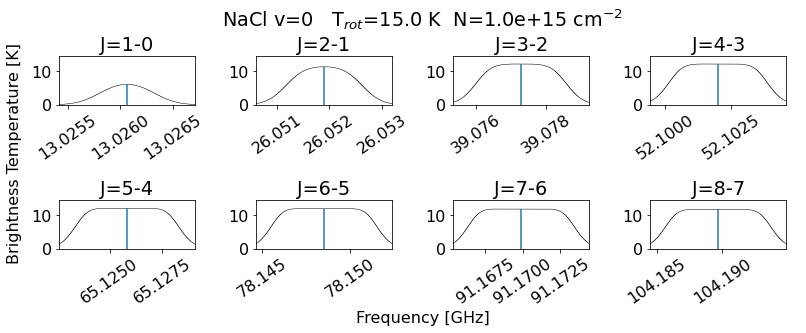

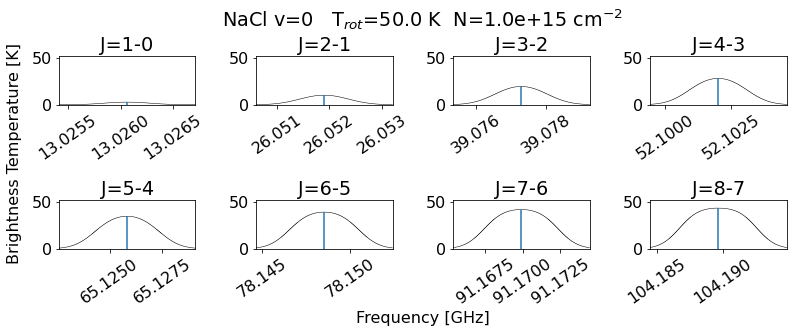

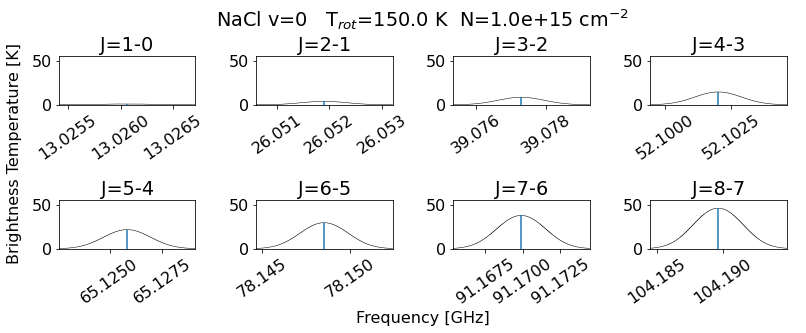

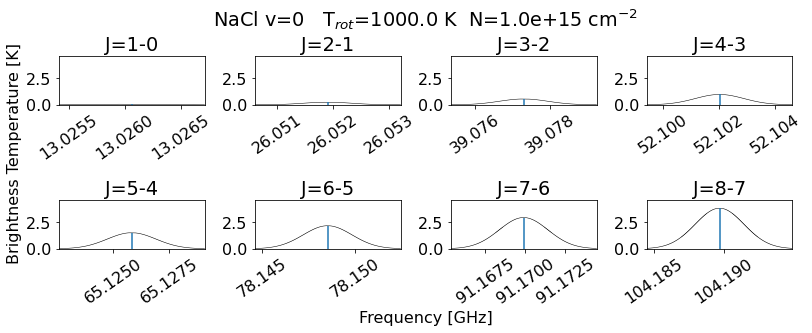

In [48]:
for tkin in (15, 50, 150, 1000)*u.K:
    fig = pl.figure(figsize=(12,6))
    ymin,ymax = 0,0
    for ii,row in enumerate(naclv0tbl[:8]):
        cfrq = row['FREQ']
        ax = pl.subplot(2,4,ii+1)
        xarr = (np.linspace(cfrq*(1-15/3e5), cfrq*(1+15/3e5),1000)*u.MHz).to(u.GHz)
        vcen = 0*u.km/u.s
        vwidth = 5*u.km/u.s
        #tkin = 150*u.K
        Ntot = 1e15*u.cm**-2
        modelcdms = pyspeckit.Spectrum(xarr=xarr, data=modfunc_nacl_CDMS(xarr, vcen, vwidth, tkin, Ntot, ))
        modelcdms.plotter(axis=ax)
        ax.vlines((cfrq*u.MHz).to(u.GHz).value, 0, modfunc_nacl_CDMS(cfrq*u.MHz, vcen, vwidth, tkin, Ntot, ).value)
        ax.set_title(f"J={row['Ju']}-{row['Jl']}")
        ax.set_xlabel("")
        ax.set_ylabel("")
        pl.xticks(rotation=35)
        pl.setp(ax.get_xticklabels(), rotation=35)#, ha="right", rotation_mode="anchor")
        ymin = min([ymin, ax.get_ylim()[0]])
        ymax = max([ymax, ax.get_ylim()[1]])
    for ax in fig.axes:
        ax.set_ylim(ymin, ymax)
    ax111 = fig.add_subplot(111, frameon=False)
    ax111.set_title(f"NaCl v=0   T$_{{rot}}$={tkin}  N={Ntot.value:0.1e} cm$^{{-2}}$", pad=30)
    ax111.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    ax111.set_xlabel("Frequency [GHz]", labelpad=40)
    ax111.set_ylabel("Brightness Temperature [K]")
    pl.tight_layout()

7 9
7 9
7 9
7 9
7 9


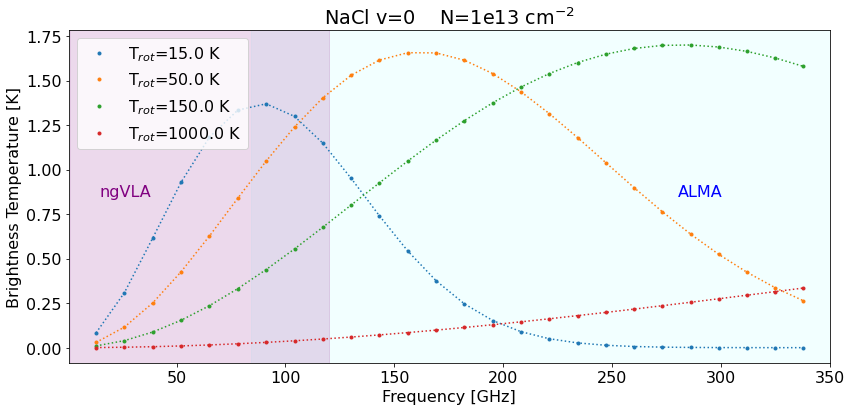

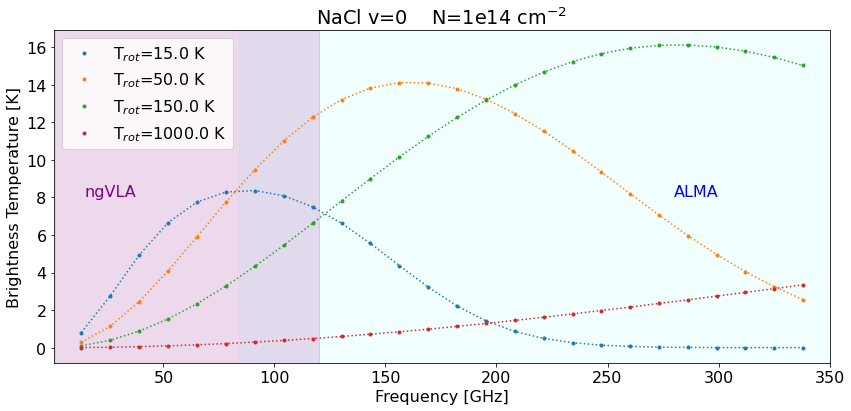

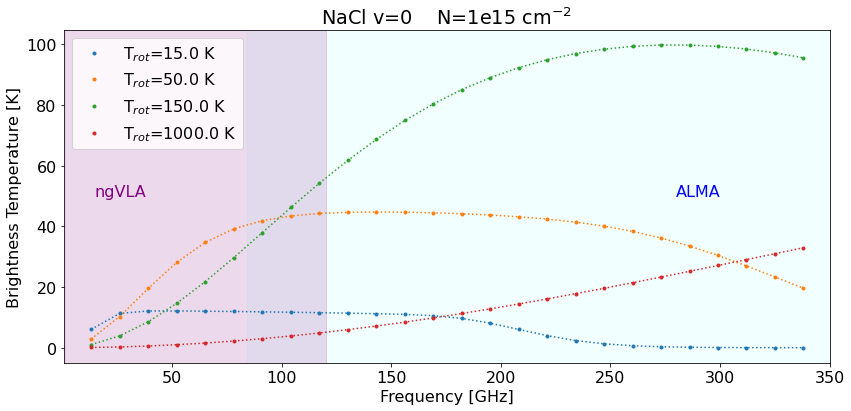

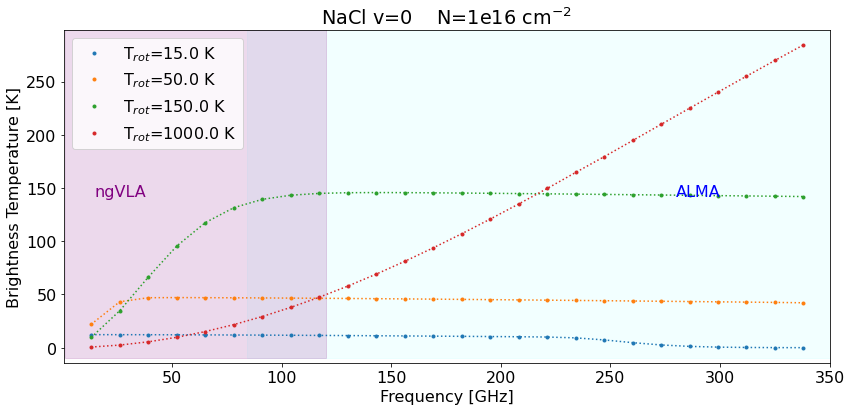

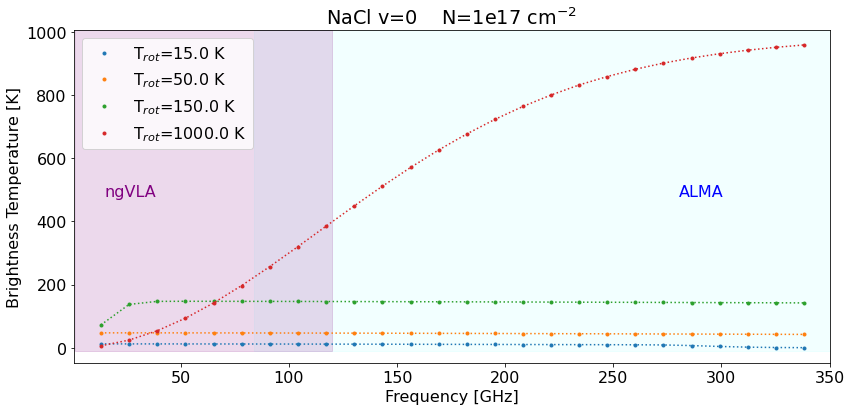

In [49]:
# SLEDs
for Ntot in (1e13,1e14,1e15,1e16,1e17):
    Ntotstr = f"{Ntot:0.0e}".replace("+","")
    Ntot = u.Quantity(Ntot, u.cm**-2)
    fig = pl.figure(figsize=(12,6))
    ax = fig.gca()
    colors = iter(pl.rcParams['axes.prop_cycle'])
    ymin,ymax = 0,0
    for tkin in (15, 50, 150, 1000)*u.K:

        vcen = 0*u.km/u.s
        vwidth = 5*u.km/u.s
        #tkin = 150*u.K
        mod = modfunc_nacl_CDMS(naclv0tbl['FREQ'].quantity, vcen, vwidth, tkin, Ntot, )
        #print(mod)
        color = next(colors)['color']
        ax.plot(naclv0tbl['FREQ'].quantity.to(u.GHz).value, mod, '.', color=color, label=f"T$_{{rot}}$={tkin}")
        ax.plot(naclv0tbl['FREQ'].quantity.to(u.GHz).value, mod, ':', color=color)#, label=f"T$_{{rot}}$={tkin}")
        #ax.vlines(v0tbl['Ju'], mod*0, mod, color=color)

        #ax.set_title(f"J={row['Ju']}-{row['Jl']}")
        #ax.set_xlabel("")
        #ax.set_ylabel("")
        #pl.xticks(rotation=35)
        #pl.setp(ax.get_xticklabels(), rotation=35)#, ha="right", rotation_mode="anchor")
        ymin = min([ymin, ax.get_ylim()[0]])
        ymax = max([ymax, ax.get_ylim()[1]])
    pl.legend(loc='upper left')
    ax.set_title(f"NaCl v=0    N={Ntotstr} cm$^{{-2}}$", )#pad=30)
    #ax.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    #ax.set_xlabel("Upper state rotation number $J_U$", )
    ax.set_xlabel("Frequency [GHz]")
    ax.set_ylabel("Brightness Temperature [K]")
    pl.tight_layout()
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(0.5, 350)
    
    #xax = ax.twiny()
    #xax.set_xlim(np.array(ax.get_xlim()) * naclv0tbl['FREQ'].quantity.to(u.GHz)[0].value)
    #xax.set_xlabel("Frequency [GHz]")
    #xax.set_xlim(1, 350)
    pl.savefig(f"ngvla/NaCl_LTE_SLEDs_N={Ntotstr}.png", dpi=300)
    
    max_ngvla_Ju = max(naclv0tbl['Ju'][naclv0tbl['FREQ'] < 120*u.GHz])
    min_alma_Ju = min(naclv0tbl['Ju'][naclv0tbl['FREQ'] > 84*u.GHz])
    print(min_alma_Ju, max_ngvla_Ju)
    
    
    #ax.fill_between([0.5, max_ngvla_Ju + 0.5], -10, 1007, alpha=0.15, zorder=-5, color='purple')
    ax.fill_between([1,120], -10, 1007, alpha=0.15, zorder=-5, color='purple')
    ax.text(0.04,0.5,'ngVLA', color='purple', transform=ax.transAxes)
    #ax.fill_between([min_alma_Ju - 0.5, 100.5], -10, 1007, alpha=0.05, zorder=-6, color='cyan')
    ax.fill_between([84, 400], -10, 1007, alpha=0.05, zorder=-6, color='cyan')
    ax.text(0.8,0.5,'ALMA', color='blue', transform=ax.transAxes)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(0.5, 350)
    #xax.set_xlim(1, 350)
    
    
    pl.savefig(f"ngvla/NaCl_LTE_SLEDs_N={Ntotstr}_labeled.png", dpi=300)


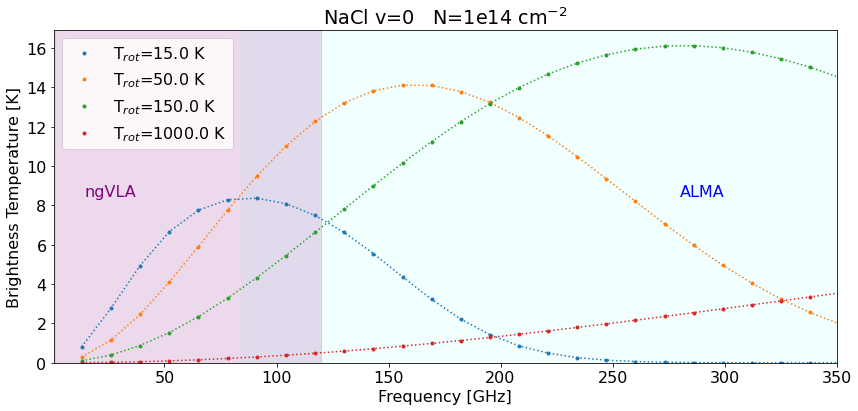

In [50]:
sledplot(molecule_fullname='NaCl, v=0-15', molecule_shortname='NaCl')

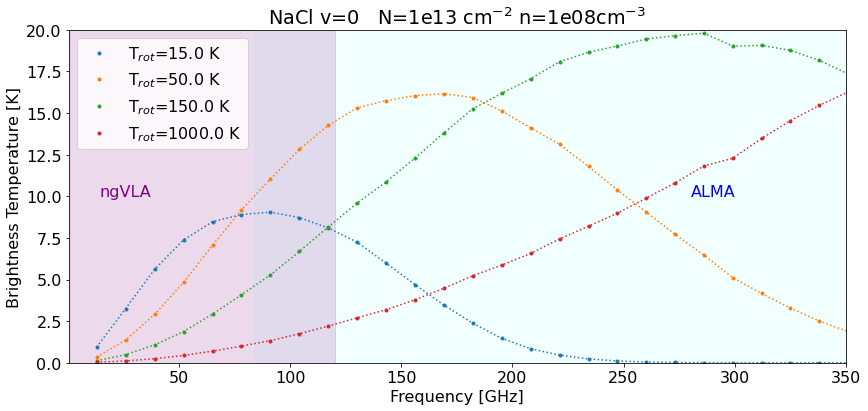

In [51]:
sledplot(molecule_fullname='nacl', molecule_shortname='NaCl', LTE=False, density=1e8, fymax=20, Ntot=1e13)

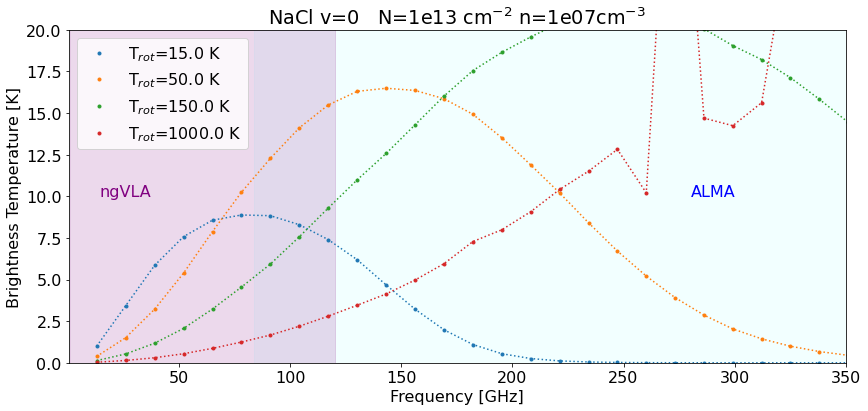

In [52]:
sledplot(molecule_fullname='nacl', molecule_shortname='NaCl', LTE=False, density=1e7, fymax=20, Ntot=1e13)

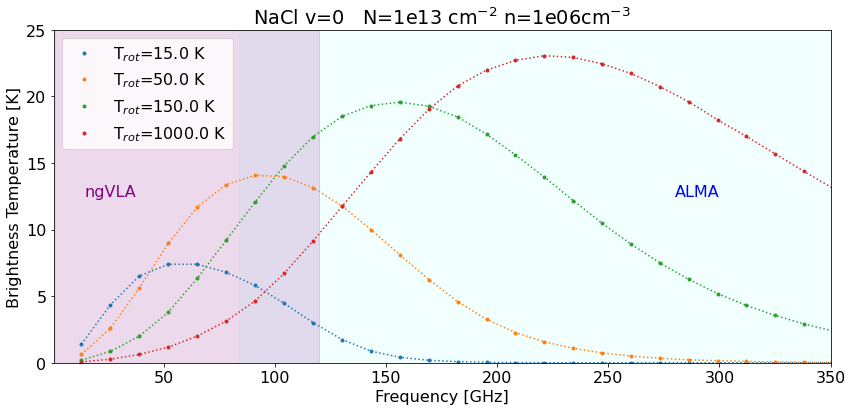

In [53]:
sledplot(molecule_fullname='nacl', molecule_shortname='NaCl', LTE=False, density=1e6, fymax=25, Ntot=1e13)

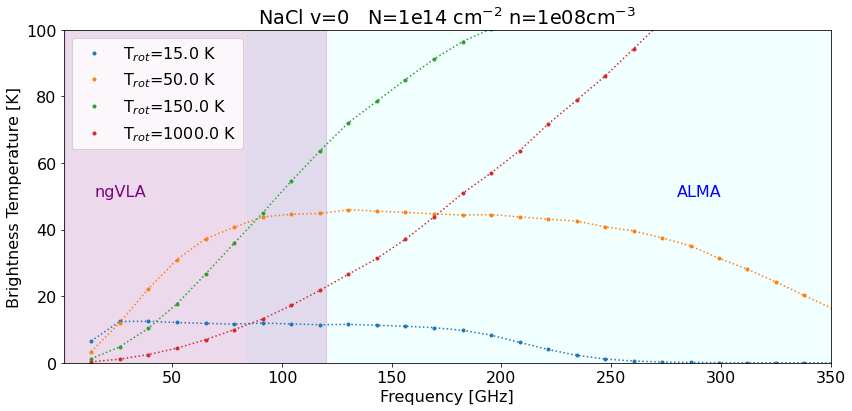

In [54]:
sledplot(molecule_fullname='nacl', molecule_shortname='NaCl', LTE=False, density=1e8, fymax=100, Ntot=1e14)

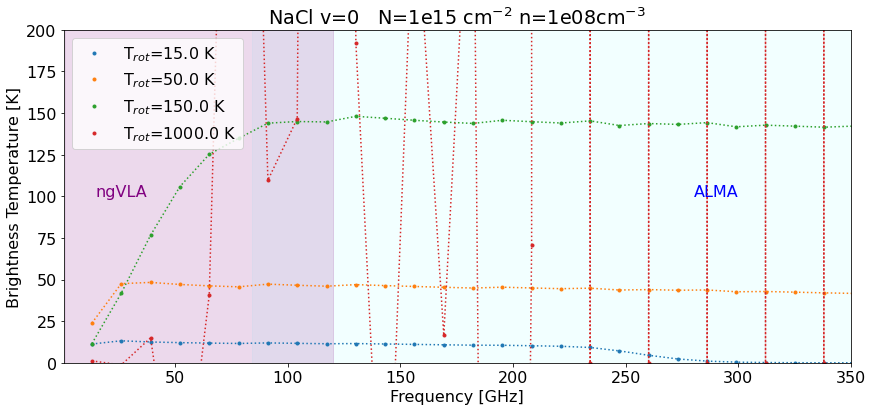

In [55]:
sledplot(molecule_fullname='nacl', molecule_shortname='NaCl', LTE=False, density=1e8, fymax=200, Ntot=1e15)

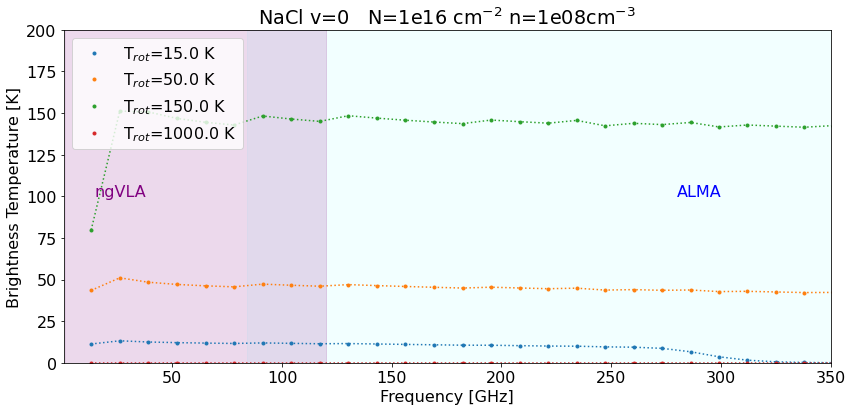

In [56]:
sledplot(molecule_fullname='nacl', molecule_shortname='NaCl', LTE=False, density=1e8, fymax=200, Ntot=1e16)

# KCl LTE

[Index](#Index)

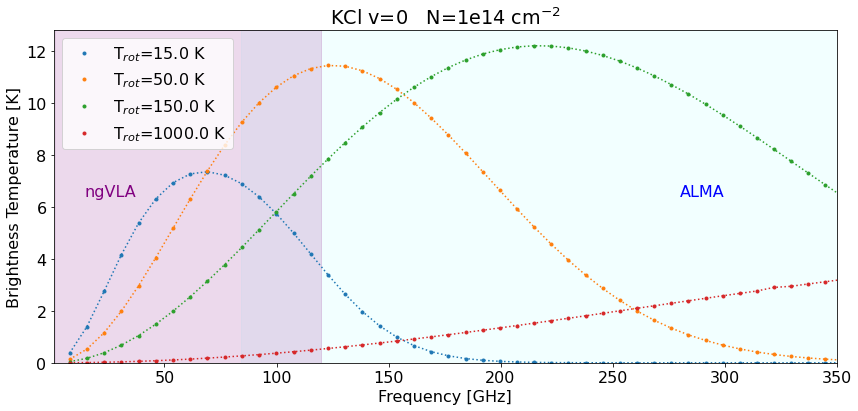

In [57]:
sledplot(molecule_fullname='KCl, v=0-15', molecule_shortname='KCl')

In [58]:
KClCfreqs, KClCaij, KClCdeg, KClCEU, KClCpartfunc = get_molecular_parameters('KCl, v=0-15',
                                                         catalog='CDMS',
                                                         fmin=5*u.GHz,
                                                         fmax=500*u.GHz)
def modfunc_kcl_CDMS(xarr, vcen, width, tex, column, **kwargs):
    model = generate_model(xarr, vcen, width, tex, 
                   column=column, freqs=KClCfreqs, aij=KClCaij, deg=KClCdeg, EU=KClCEU, partfunc=KClCpartfunc)*u.K
    return model

In [59]:
[x for x in CDMS.get_species_table()['NAME'] if 'kcl' in x.lower()]

['KCl, v=0-15', 'KCl-36, v=0-5', 'KCl-37, v=0-15']

In [60]:
CDMS.query_lines(10*u.GHz, 20*u.GHz, molecule='KCl, v=0-15', parse_name_locally=True)

FREQ,ERR,LGINT,DR,ELO,GUP,MOLWT,TAG,QNFMT,Ju,Ku,vu,F1u,F2u,F3u,Jl,Kl,vl,F1l,F2l,F3l,name,Lab
MHz,MHz,MHz nm2,,1 / cm,,u,,,,,,,,,,,,,,,,
float64,float64,float64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str11,bool
14005.4789,0.0095,-12.002,2,3922.7734,5,74,5051,202,2,15,--,--,--,--,1,15,--,--,--,--,"KCl, v=0-15",False
14094.0891,0.0075,-11.489,2,3676.705,5,74,5051,202,2,14,--,--,--,--,1,14,--,--,--,--,"KCl, v=0-15",False
14183.1248,0.0059,-10.972,2,3428.5124,5,74,5051,202,2,13,--,--,--,--,1,13,--,--,--,--,"KCl, v=0-15",False
14272.5835,0.0045,-10.45,2,3178.177,5,74,5051,202,2,12,--,--,--,--,1,12,--,--,--,--,"KCl, v=0-15",False
14362.4626,0.0033,-9.9238,2,2925.6803,5,74,5051,202,2,11,--,--,--,--,1,11,--,--,--,--,"KCl, v=0-15",False
14452.7595,0.0024,-9.393,2,2671.0036,5,74,5051,202,2,10,--,--,--,--,1,10,--,--,--,--,"KCl, v=0-15",False
14543.4713,0.0017,-8.8576,2,2414.1284,5,74,5051,202,2,9,--,--,--,--,1,9,--,--,--,--,"KCl, v=0-15",False
14634.5953,0.0012,-8.3176,2,2155.0361,5,74,5051,202,2,8,--,--,--,--,1,8,--,--,--,--,"KCl, v=0-15",False


In [61]:
kcltbl = CDMS.query_lines(10*u.GHz, 350*u.GHz, molecule='KCl, v=0-15', parse_name_locally=True)
kcltbl.sort('FREQ')
kcltbl.add_index('Ku')
kclv0tbl = kcltbl.loc[0]
kclv0tbl.sort('FREQ')

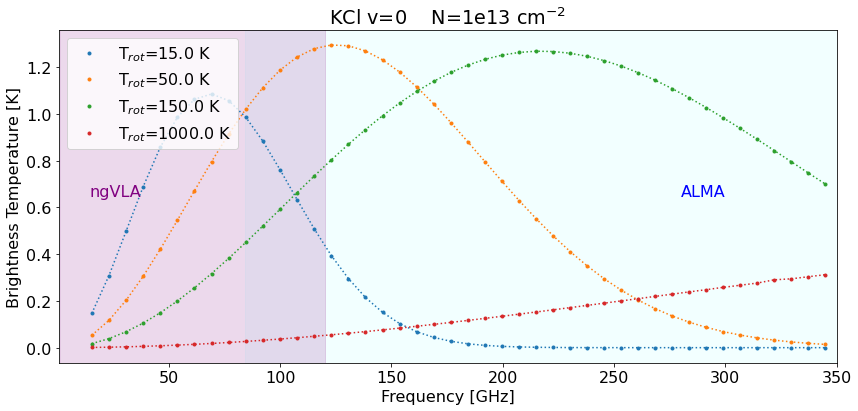

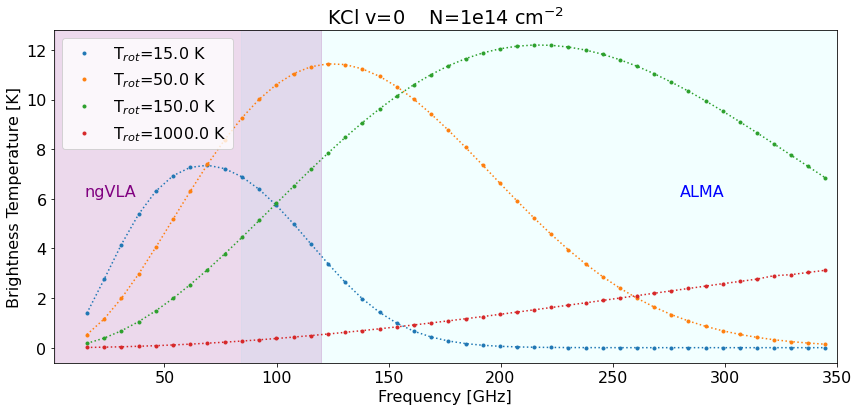

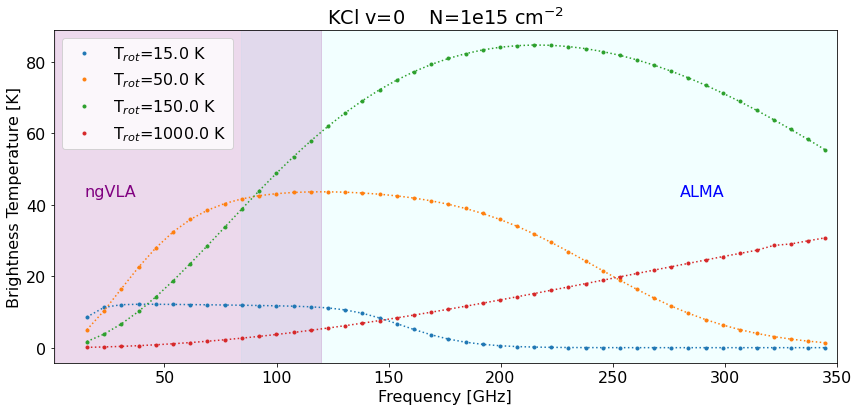

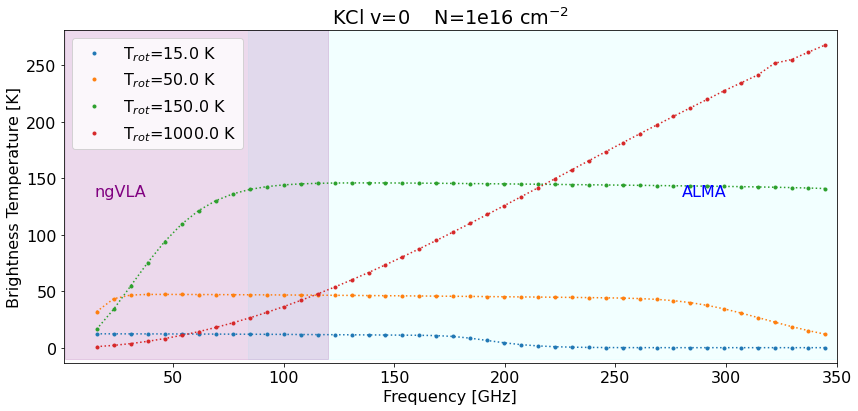

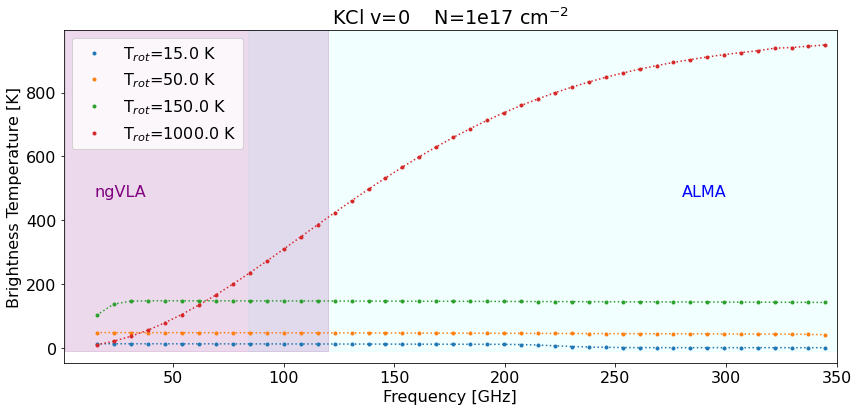

In [62]:
# SLEDs
for Ntot in (1e13,1e14,1e15,1e16,1e17):
    Ntotstr = f"{Ntot:0.0e}".replace("+","")
    Ntot = u.Quantity(Ntot, u.cm**-2)
    fig = pl.figure(figsize=(12,6))
    ax = fig.gca()
    colors = iter(pl.rcParams['axes.prop_cycle'])
    ymin,ymax = 0,0
    for tkin in (15, 50, 150, 1000)*u.K:
        cfrq = row['FREQ']

        vcen = 0*u.km/u.s
        vwidth = 5*u.km/u.s
        #tkin = 150*u.K
        mod = modfunc_kcl_CDMS(kclv0tbl['FREQ'].quantity, vcen, vwidth, tkin, Ntot, )
        #print(mod)
        color = next(colors)['color']
        ax.plot(kclv0tbl['FREQ'].quantity.to(u.GHz).value, mod, '.', color=color, label=f"T$_{{rot}}$={tkin}")
        ax.plot(kclv0tbl['FREQ'].quantity.to(u.GHz).value, mod, ':', color=color)#, label=f"T$_{{rot}}$={tkin}")
        #ax.vlines(v0tbl['Ju'], mod*0, mod, color=color)

        #ax.set_title(f"J={row['Ju']}-{row['Jl']}")
        #ax.set_xlabel("")
        #ax.set_ylabel("")
        #pl.xticks(rotation=35)
        #pl.setp(ax.get_xticklabels(), rotation=35)#, ha="right", rotation_mode="anchor")
        ymin = min([ymin, ax.get_ylim()[0]])
        ymax = max([ymax, ax.get_ylim()[1]])
        
    pl.legend(loc='upper left')
    ax.set_title(f"KCl v=0    N={Ntotstr} cm$^{{-2}}$", )#pad=30)
    #ax.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    ax.set_xlabel("Frequency [GHz]")#.set_xlabel("Upper state rotation number $J_U$", )
    ax.set_ylabel("Brightness Temperature [K]")

    
    pl.tight_layout()
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(0.5, 350)
    #xax = ax.twiny()
    #xax.set_xlim(np.array(ax.get_xlim()) * kclv0tbl['FREQ'].quantity.to(u.GHz)[0].value)
    #xax.set_xlabel("Frequency [GHz]")
    pl.savefig(f"ngvla/KCl_LTE_SLEDs_N={Ntotstr}.png", dpi=300)
    
    max_ngvla_Ju = max(kclv0tbl['Ju'][kclv0tbl['FREQ'] < 120*u.GHz])
    min_alma_Ju = min(kclv0tbl['Ju'][kclv0tbl['FREQ'] > 84*u.GHz])
    
    
    #ax.fill_between([0.5, max_ngvla_Ju + 0.5], -10, 1007, alpha=0.15, zorder=-5, color='purple')
    ax.fill_between([1,120], -10, 1007, alpha=0.15, zorder=-5, color='purple')
    ax.text(0.04,0.5,'ngVLA', color='purple', transform=ax.transAxes)
    #ax.fill_between([min_alma_Ju - 0.5, 100.5], -10, 1007, alpha=0.05, zorder=-6, color='cyan')
    ax.fill_between([84, 400], -10, 1007, alpha=0.05, zorder=-6, color='cyan')
    ax.text(0.8,0.5,'ALMA', color='blue', transform=ax.transAxes)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(0.5, 350)
  
    pl.savefig(f"ngvla/KCl_LTE_SLEDs_N={Ntotstr}_labeled.png", dpi=300)


# SiS LTE

[Index](#Index)

In [63]:
[x for x in CDMS.get_species_table()['NAME'] if 'sis' in x.lower()]

['SiS, v=0-20',
 'SiS, v=1-0,2-1',
 'SiS, v=2-0',
 'SiS-33, v=0-9',
 'HSiS',
 'SiS-34, v=0-12',
 'SiS-34, v=1-0',
 'H2SiS',
 'SiS-36',
 'OSiS']

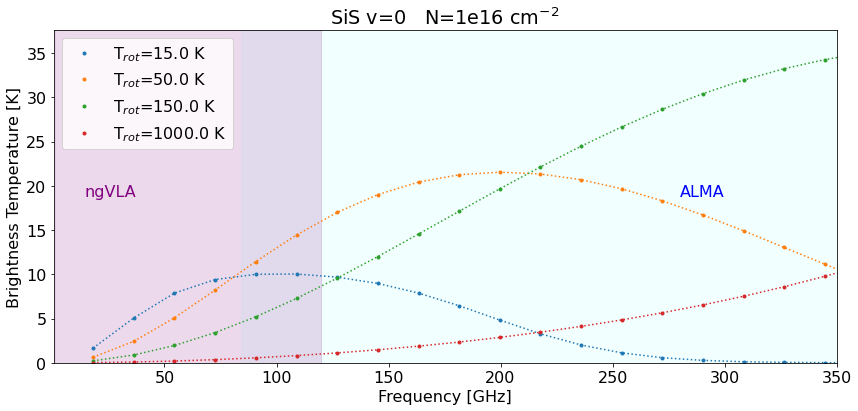

In [64]:
sledplot(molecule_fullname='SiS, v=0-20', molecule_shortname='SiS', Ntot=1e16)

# PN LTE
[Index](#Index)

In [65]:
[x for x in CDMS.get_species_table()['NAME'] if 'pn' in x.lower()]

['PN, v=0-5', 'PN-15, v=0-1', 'PNO']

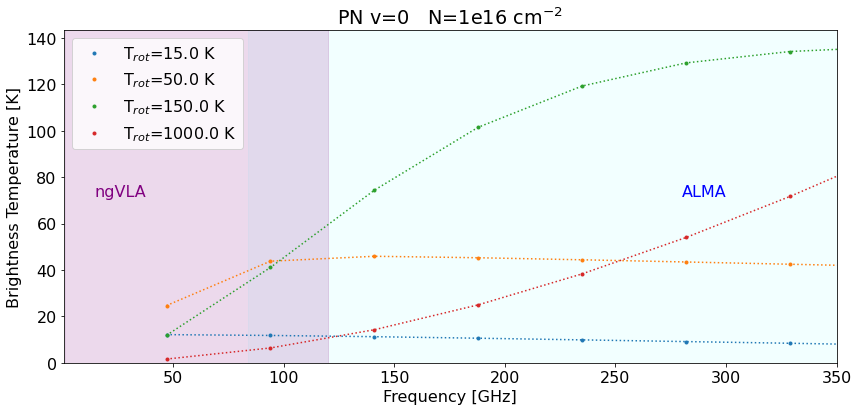

In [67]:
sledplot(molecule_fullname='PN, v=0-5', molecule_shortname='PN', Ntot=1e16)

In [ ]:


# This notebook is a dud

XCLASS doesn't play nice with NaCl out of the box

In [ ]:
raise

In [ ]:
source_size =  0.01
tkin = 200
Ntot = 1.0061155735e+16
vwidth_fwhm = 4.2101396644e+00
vwidth = vwidth_fwhm / np.sqrt(8*np.log(2))
vcen = -7.9000000000e+00
tbg = 0

In [ ]:
# define path and name of molfit file
#DEFAULT MolfitsFileName = LocalPath + "files/my_molecules.molfit"
LocalPath = os.getcwd() + "/"

MolfitsFileName = LocalPath + 'NaCl_pure.molfit'

def set_xclass_parameters(source_size=source_size, tkin=tkin, Ntot=Ntot, vwidth_fwhm=vwidth_fwhm, vcen=vcen, filename=MolfitsFileName):
    with open(filename, "w") as fh:
        fh.write(f"""
%============================================================================================================================
%
% define molecules and their components:
%
%============================================================================================================================
%    source size:                 T_kin:               N_tot:            V_width:                V_off:   CFFlag:    keyword:
%       [arcsec]:                   [K]:              [cm-2]:            [km /s]:              [km /s]:       []:         []:
NaCl;v=0;           1
 {source_size}       {tkin}     {Ntot}     {vwidth_fwhm}    {vcen}         c
NaCl;v=1;           1
 {source_size}       {tkin}     {Ntot}     {vwidth_fwhm}    {vcen}         c
NaCl;v=2;           1
 {source_size}       {tkin}     {Ntot}     {vwidth_fwhm}    {vcen}         c
""")

In [ ]:
import sys
import os


# get path of XCLASS directory
XCLASSRootDir = str(os.environ.get('XCLASSRootDir', '')).strip()
XCLASSRootDir = os.path.normpath(XCLASSRootDir) + "/"

# extend sys.path variable
NewPath = XCLASSRootDir + "build_tasks/"
if (not NewPath in sys.path):
    sys.path.append(NewPath)

import task_myXCLASS

# define min. freq. (in MHz)
FreqMin = 25000.0

# define max. freq. (in MHz)
FreqMax = 85000.0

# define freq. step (in MHz)
FreqStep = 100

# depending on parameter "Inter_Flag" define beam size (in arcsec)
# (Inter_Flag = True) or size of telescope (in m) (Inter_Flag = False)
TelescopeSize = 100000.0 # meters

# define beam minor axis length (in arsec)
BMIN = 0.01

# define beam major axis length (in arsec)
BMAJ = 0.01

# define beam position angle (in degree)
BPA = 0

# interferrometric data?
Inter_Flag = True

# define red shift
Redshift = None

# BACKGROUND: describe continuum with tBack and tslope only
t_back_flag = True

# BACKGROUND: define background temperature (in K)
tBack = 0.0

# BACKGROUND: define temperature slope (dimensionless)
tslope = 0.0

# BACKGROUND: define path and name of ASCII file describing continuum as function
#             of frequency
BackgroundFileName = ""

# DUST: define hydrogen column density (in cm^(-2))
N_H = 1.e22

# DUST: define spectral index for dust (dimensionless)
beta_dust = 0.0

# DUST: define kappa at 1.3 mm (cm^(2) g^(-1))
kappa_1300 = 0.0

# DUST: define path and name of ASCII file describing dust opacity as
#       function of frequency
DustFileName = ""

# FREE-FREE: define electronic temperature (in K)
Te_ff = None

# FREE-FREE: define emission measure (in pc cm^(-6))
EM_ff = None

# SYNCHROTRON: define kappa of energy spectrum of electrons (electrons m^(−3) GeV^(-1))
kappa_sync = None

# SYNCHROTRON: define magnetic field (in Gauss)
B_sync = None

# SYNCHROTRON: energy spectral index (dimensionless)
p_sync = None

# SYNCHROTRON: thickness of slab (in AU)
l_sync = None

# PHEN-CONT: define phenomenological function which is used to describe
#            the continuum
ContPhenFuncID = None

# PHEN-CONT: define first parameter for phenomenological function
ContPhenFuncParam1 = None

# PHEN-CONT: define second parameter for phenomenological function
ContPhenFuncParam2 = None

# PHEN-CONT: define third parameter for phenomenological function
ContPhenFuncParam3 = None

# PHEN-CONT: define fourth parameter for phenomenological function
ContPhenFuncParam4 = None

# PHEN-CONT: define fifth parameter for phenomenological function
ContPhenFuncParam5 = None

# use iso ratio file?
iso_flag = True

# define path and name of iso ratio file
#DEFAULT IsoTableFileName = LocalPath + "files/my_isonames.txt"
IsoTableFileName = LocalPath + "my_isonames.txt"

# define path and name of file describing Non-LTE parameters
CollisionFileName = ""

# define number of pixels in x-direction (used for sub-beam description)
NumModelPixelXX = 100

# define number of pixels in y-direction (used for sub-beam description)
NumModelPixelYY = 100

# take local-overlap into account or not
LocalOverlapFlag = False

# disable sub-beam description
NoSubBeamFlag = True

# define path and name of database file
dbFilename = ""

# define rest freq. (in MHz)
RestFreq = 0.0

# define v_lsr (in km/s)
vLSR = 0.0

In [ ]:
import io
from contextlib import redirect_stdout

def myxclass_call(FreqMin=1e3, FreqMax=1e4, verbose=False):
    ## call myXCLASS function
    with io.StringIO() as buf, redirect_stdout(buf):
        modeldata, log, TransEnergies, IntOpt, JobDir = task_myXCLASS.myXCLASS(
                                                    FreqMin, FreqMax, FreqStep,
                                                    TelescopeSize, BMIN, BMAJ,
                                                    BPA, Inter_Flag, Redshift,
                                                    t_back_flag, tBack, tslope,
                                                    BackgroundFileName,
                                                    N_H, beta_dust, kappa_1300,
                                                    DustFileName, Te_ff, EM_ff,
                                                    kappa_sync, B_sync, p_sync,
                                                    l_sync, ContPhenFuncID,
                                                    ContPhenFuncParam1,
                                                    ContPhenFuncParam2,
                                                    ContPhenFuncParam3,
                                                    ContPhenFuncParam4,
                                                    ContPhenFuncParam5,
                                                    MolfitsFileName, iso_flag,
                                                    IsoTableFileName,
                                                    CollisionFileName,
                                                    NumModelPixelXX,
                                                    NumModelPixelYY,
                                                    LocalOverlapFlag,
                                                    NoSubBeamFlag,
                                                    dbFilename,
                                                    RestFreq, vLSR)
        output = buf.getvalue()
    if verbose:
        print(output)
        
    return modeldata, log, TransEnergies, IntOpt, JobDir

In [ ]:
modeldata

In [ ]:
set_xclass_parameters()
modeldata, log, TransEnergies, IntOpt, JobDir = myxclass_call(FreqMin=FreqMin, FreqMax=FreqMax)

In [ ]:
from astropy import units as u, constants

In [ ]:
xaxis, yaxis = np.array(modeldata).T
xclass_spectrum = pyspeckit.Spectrum(xarr=xaxis*u.MHz, data=yaxis*u.K)

In [ ]:
pl.close('all')

In [ ]:
pl.figure(1)
pl.plot([0,1])

In [ ]:
line_list.append(pl.gca().get_xlim())

In [ ]:
fig=pl.figure(1)
ax=pl.gca()
xclass_spectrum.plotter(axis=ax, clear=True)

In [ ]:
from pyspeckit.spectrum.models import lte_molecule
from pyspeckit.spectrum.models.lte_molecule import get_molecular_parameters, get_molecular_parameters, generate_model, generate_fitter

In [ ]:
ch3_13cn_to_ch3cn = 1./16.

In [ ]:
Cfreqs, Caij, Cdeg, CEU, Cpartfunc = get_molecular_parameters('NaCl',
                                                         catalog='CDMS',
                                                         fmin=FreqMin*u.MHz,
                                                         fmax=FreqMax*u.MHz)
def modfunc_12c_CDMS(xarr, vcen, width, tex, column, **kwargs):
    model = generate_model(xarr, vcen, width, tex, 
                   column=column, freqs=Cfreqs, aij=Caij, deg=Cdeg, EU=CEU, partfunc=Cpartfunc)
    return model

In [ ]:
freqs, aij, deg, EU, partfunc = get_molecular_parameters('NaCl',
                                                         catalog='JPL',
                                                         fmin=FreqMin*u.MHz,
                                                         fmax=FreqMax*u.MHz)
freqs13, aij13, deg13, EU13, partfunc13 = lte_molecule.get_molecular_parameters('NaCl',
                                                                                catalog='JPL',
                                                         fmin=FreqMin*u.MHz,
                                                         fmax=FreqMax*u.MHz)
def modfunc_12c(xarr, vcen, width, tex, column, **kwargs):
    model = generate_model(xarr, vcen, width, tex, 
                   column=column, freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc)
    return model

def modfunc_13c(xarr, vcen, width, tex, column, **kwargs):
    model = generate_model(xarr, vcen, width, tex, 
                   column=column*ch3_13cn_to_ch3cn, freqs=freqs13, aij=aij13, deg=deg13, EU=EU13, partfunc=partfunc13)
    return model


def modfunc(xarr, vcen, width, tex, column, **kwargs):
    join = np.concatenate
    model = generate_model(xarr, vcen, width, tex, 
                   column=join([np.ones_like(deg)*column, np.ones_like(deg13)*column*ch3_13cn_to_ch3cn]),
                   freqs=join([freqs, freqs13]),
                   aij=join([aij, aij13]),
                   deg=join([deg, deg13]),
                   EU=join([EU, EU13]),
                   partfunc=join([np.ones_like(deg)*partfunc(tex), np.ones_like(deg13)*partfunc13(tex)])
                  )
    return model
    
fitter = generate_fitter(modfunc, name="CH3CN")

In [ ]:
model12cdms = pyspeckit.Spectrum(xarr=xclass_spectrum.xarr, data=modfunc_12c_CDMS(xclass_spectrum.xarr, vcen, vwidth, tkin, Ntot, ))

model12 = pyspeckit.Spectrum(xarr=xclass_spectrum.xarr, data=modfunc_12c(xclass_spectrum.xarr, vcen, vwidth, tkin, Ntot, ))
model13 = pyspeckit.Spectrum(xarr=xclass_spectrum.xarr, data=modfunc_13c(xclass_spectrum.xarr, vcen, vwidth, tkin, Ntot, ))
model = pyspeckit.Spectrum(xarr=xclass_spectrum.xarr, data=modfunc(xclass_spectrum.xarr, vcen, vwidth, tkin, Ntot, ))

In [ ]:
fig = pl.figure(figsize=(12,8))
xclass_spectrum.plotter(alpha=0.75, figure=fig, label='XCLASS', linewidth=1, zorder=-5)
ax = xclass_spectrum.plotter.axis
#model.plotter(clear=False, color='r', axis=ax, alpha=0.75, label='JPL')
model12.plotter(clear=False, color='b', axis=ax, alpha=0.75, label='JPL CH$_3$CN')
#model13.plotter(clear=False, color='g', axis=ax, alpha=0.75, label='JPL CH$_3$$^{13}$CN')
model12cdms.plotter(clear=False, color='orange', axis=ax, alpha=0.75, label='CDMS CH$_3$CN')

ax.axhline(lte_molecule.Jnu_cgs(220.65e9, tkin) - lte_molecule.Jnu_cgs(220.65e9, 2.73), label='$T_{ex}$')
ax.set_xlim(220550, 220770)
ax.set_ylim(-5, 80)
pl.legend(loc='best')

In [ ]:
fig = pl.figure(figsize=(12,8))
xclass_spectrum.plotter(alpha=0.75, figure=fig, label='XCLASS', linewidth=1, zorder=-5)
ax = xclass_spectrum.plotter.axis
model.plotter(clear=False, color='r', axis=ax, alpha=0.75, label='JPL')
model12.plotter(clear=False, color='b', axis=ax, alpha=0.75, label='JPL CH$_3$CN')
model13.plotter(clear=False, color='g', axis=ax, alpha=0.75, label='JPL CH$_3$$^{13}$CN')
model12cdms.plotter(clear=False, color='orange', axis=ax, alpha=0.75, label='CDMS CH$_3$CN')

ax.axhline(lte_molecule.Jnu_cgs(220.65e9, tkin) - lte_molecule.Jnu_cgs(220.65e9, 2.73), label='$T_{ex}$')
ax.set_xlim(220550, 220770)
ax.set_ylim(-5, 80)
pl.legend(loc='best')

In [ ]:
temperatures = [10, 50, 100, 300]
columns = [1e14, 1e15, 1e16, 1e17]

temcol_results = {}
for tem in temperatures:
    temcol_results[tem] = {}
    for col in columns:
        print(col, tem)
        set_xclass_parameters(tkin=tem, Ntot=col)
        modeldata, log, TransEnergies, IntOpt, JobDir = myxclass_call(FreqMin=FreqMin, FreqMax=FreqMax)
        JM_ = modfunc(modeldata.T[0]*u.MHz, vcen, width=vwidth, tex=tem, column=col)
        model_JPL_ = pyspeckit.Spectrum(xarr=modeldata.T[0]*u.MHz, data=JM_*u.K, header={})
        temcol_results[tem][col] = {'xclass':
                               {'modeldata':modeldata, 'log':log, 'TransEnergies':TransEnergies, 'IntOpt':IntOpt, 'JobDir':JobDir, 
                                'sp': pyspeckit.Spectrum(data=modeldata.T[1]*u.K, xarr=modeldata.T[0]*u.MHz, header={})},
                               'jpl': model_JPL_}

In [ ]:
pl.figure(figsize=(12,12))
ii = 1
for tem in temperatures:
    for col in columns:
        ax = pl.subplot(4,4,ii)
        #temcol_results[tem][col]['xclass']['sp'].xarr.convert_to_unit(u.km/u.s, velocity_convention='radio', refX=115271.2018*u.MHz)
        #temcol_results[tem][col]['jpl'].xarr.convert_to_unit(u.km/u.s, velocity_convention='radio', refX=115271.2018*u.MHz)
        temcol_results[tem][col]['xclass']['sp'].plotter(axis=ax)
        temcol_results[tem][col]['jpl'].plotter(axis=ax, clear=False, color='r')
        ax.set_title(f"T={tem} N={col}")
        if ii <= 12:
            ax.set_xlabel('')
            ax.set_xticklabels([])
        #else:
        #    ax.set_xlabel("$V_{LSR}$ [km s$^{-1}$]")
        if ii % 4 == 1:
            ylim = ax.get_ylim()
        if ii % 4 != 1:
            ax.set_ylabel('')
        ii += 1
        ax.set_xlim(220550, 220770)


In [ ]:
temperatures = [200,250,300,350]
columns = [1e14, 1e15, 1e16, 1e17]

temcol_results = {}
for tem in temperatures:
    temcol_results[tem] = {}
    for col in columns:
        print(col, tem)
        set_xclass_parameters(tkin=tem, Ntot=col)
        modeldata, log, TransEnergies, IntOpt, JobDir = myxclass_call(FreqMin=FreqMin, FreqMax=FreqMax)
        CM_ = modfunc_12c_CDMS(modeldata.T[0]*u.MHz, vcen, width=vwidth, tex=tem, column=col)
        model_CM_ = pyspeckit.Spectrum(xarr=modeldata.T[0]*u.MHz, data=CM_*u.K, header={})
        temcol_results[tem][col] = {'xclass':
                               {'modeldata':modeldata, 'log':log, 'TransEnergies':TransEnergies, 'IntOpt':IntOpt, 'JobDir':JobDir, 
                                'sp': pyspeckit.Spectrum(data=modeldata.T[1]*u.K, xarr=modeldata.T[0]*u.MHz, header={})},
                               'cdms': model_CM_}

In [ ]:
pl.figure(figsize=(12,12))
ii = 1
for tem in temperatures:
    for col in columns:
        ax = pl.subplot(4,4,ii)
        #temcol_results[tem][col]['xclass']['sp'].xarr.convert_to_unit(u.km/u.s, velocity_convention='radio', refX=115271.2018*u.MHz)
        #temcol_results[tem][col]['jpl'].xarr.convert_to_unit(u.km/u.s, velocity_convention='radio', refX=115271.2018*u.MHz)
        temcol_results[tem][col]['xclass']['sp'].plotter(axis=ax)
        temcol_results[tem][col]['cdms'].plotter(axis=ax, clear=False, color='r')
        ax.set_title(f"T={tem} N={col}")
        if ii <= 12:
            ax.set_xlabel('')
            ax.set_xticklabels([])
        #else:
        #    ax.set_xlabel("$V_{LSR}$ [km s$^{-1}$]")
        if ii % 4 == 1:
            ylim = ax.get_ylim()
        if ii % 4 != 1:
            ax.set_ylabel('')
        ii += 1
        ax.set_xlim(220550, 220770)


In [ ]:
Cfreqs, Caij, Cdeg, CEU, Cpartfunc

In [ ]:
len(Cdeg)

In [ ]:
from astropy.table import Table

In [ ]:
xclass_transitions = [{'freq': float(x[0]),
                       'intensity': float(x[2]),
                       'integrated_intensity': float(x[3]),
                       'elow': float(x[4]),
                       'gup': int(float(x[5])),
                       'aij': float(x[6]),
                       'Q': " ".join(x[7:-1]),
                       'name': x[-1]}
                      for x in TransEnergies[1:]]
xctb = Table(xclass_transitions)

In [ ]:
blah = xctb[xctb['name'] == 'CH3CN;v=0;']
blah2 = blah[(blah['freq'] < 220.8e3) & (blah['freq'] > 220.2e3)]
blah2.sort('freq')
blah2

In [ ]:
pl.plot(blah2['freq'], blah2['aij'], 'o')
pl.plot(Cfreqs, 10**Caij, 's', alpha=0.5)

In [ ]:
pl.plot(blah2['freq'], blah2['elow'], 'o')
pl.plot(Cfreqs, (CEU*u.erg/constants.k_B - Cfreqs*constants.h/constants.k_B).to(u.K), 's', alpha=0.5)

In [ ]:
log

In [ ]:
import task_DatabaseQuery
QueryString = "select * from Partitionfunctions where PF_Name='CH3CN;v=0;'"
Contents = task_DatabaseQuery.DatabaseQuery(QueryString)
# The partition function values are stored in "Contents[0][5:5+110]"

In [ ]:
Contents

In [ ]:
T = [1.072, 1.148, 1.23, 1.318, 1.413, 1.514, 1.622, 1.738, 1.862, 1.995, 2.138, 2.291, 2.455, 2.63, 2.725, 2.818, 3.02, 3.236, 3.467, 3.715, 3.981, 4.266, 4.571, 4.898, 5, 5.248, 5.623, 6.026, 6.457, 6.918, 7.413, 7.943, 8.511, 9.12, 9.375, 9.772, 10.471, 11.22, 12.023, 12.882, 13.804, 14.791, 15.849, 16.982, 18.197, 18.75, 19.498, 20.893, 22.387, 23.988, 25.704, 27.542, 29.512, 31.623, 33.884, 36.308, 37.5, 38.905, 41.687, 44.668, 47.863, 51.286, 54.954, 58.884, 63.096, 67.608, 72.444, 75, 77.625, 83.176, 89.125, 95.499, 102.329, 109.648, 117.49, 125.893, 134.896, 144.544, 150, 154.882, 165.959, 177.828, 190.546, 204.174, 218.776, 225, 234.423, 251.189, 269.153, 288.403, 300, 309.03, 331.131, 354.813, 380.189, 407.38, 436.516, 467.735, 500, 501.187, 537.032, 575.44, 616.595, 660.693, 707.946, 758.578, 812.831, 870.964, 933.254, 1000]

In [ ]:
pl.plot(T, Contents[0][5:115], '.')
pl.plot(T, Cpartfunc(T))

In [ ]:
!mv c041001.cat ch3cn.cat

In [ ]:
from molsim.classes import Workspace, Catalog, Transition, Level, Molecule, PartitionFunction, Spectrum, Simulation, Continuum, Source, Observatory, Observation, Iplot, Trace
from molsim.file_handling import load_mol, load_obs, load_multi_obs
ch3cn = load_mol('ch3cn.cat', 
              type='SPCAT',
              qpart_file='ch3cn.qpart')
ch3cn_src = Source(column = Ntot, #column density in cm-2
                Tex = tkin, #excitation temperature in K
                dV = vwidth_fwhm, #FWHM linewidth in km/s
                velocity = vcen, #vlsr in km/s
                size = 1e20, #source size in arcseconds; default is 1E20 so no beam dilution is considered.
                continuum = Continuum(params=tbg), 
                #a continuum object to define the background temperature. Default 2.7 K.
                #This can be substantially more flexible if needed - see the Continuum class object.
                )
ch3cn_sim = Simulation(  observation = Observation(), #a default Observation object (see note below)
                      source = ch3cn_src, #the source of emission
                      ll = FreqMin, #lower limit
                      ul = FreqMax, #upper limit
                      res = FreqStep, #resolution in MHz
                      mol = ch3cn, #molecule
)
molsim_sp = pyspeckit.Spectrum(xarr=ch3cn_sim.spectrum.freq_profile*u.MHz, data=ch3cn_sim.spectrum.int_profile*u.K, header={})

In [ ]:
pl.plot(T, Contents[0][5:115], '.', label='XCLASS')
pl.plot(T, Cpartfunc(T), label='pyspeckit + CDMS', alpha=0.5)
pl.plot(T, partfunc(T), label='pyspeckit + JPL', alpha=0.5)
pl.plot(T, ch3cn.qpart.qrot(T), label='molsim', alpha=0.5)
pl.legend(loc='best')
pl.gca().axis([0,400,0,25000])
pl.xlabel("Temperature")
pl.ylabel("$Q_{rot}$")

In [ ]:
from astroquery.jplspec import JPLSpec
st = JPLSpec.get_species_table()
st[st['NAME'] == 'CH3CN']

In [ ]:
st.meta

In [ ]:
row = [st[st['NAME'] == 'CH3CN'][x] for x in ["QLOG1","QLOG2","QLOG3","QLOG4","QLOG5","QLOG6","QLOG7"]]
row

In [ ]:
import task_DatabaseQuery
QueryString = "select * from Partitionfunctions where PF_Name='CH3CN;'"
Contents = task_DatabaseQuery.DatabaseQuery(QueryString)

import task_UpdateDatabase
DBUpdateNew = "new"
task_UpdateDatabase.UpdateDatabase(DBUpdateNew)

In [ ]:
import task_DatabaseQuery
QueryString = "select * from Partitionfunctions where PF_Name='CH3CN;v=0;'"
Contents = task_DatabaseQuery.DatabaseQuery(QueryString)

T = [1.072, 1.148, 1.23, 1.318, 1.413, 1.514, 1.622, 1.738, 1.862, 1.995, 2.138, 2.291, 2.455, 2.63, 2.725, 2.818, 3.02, 3.236, 3.467, 3.715, 3.981, 4.266, 4.571, 4.898, 5, 5.248, 5.623, 6.026, 6.457, 6.918, 7.413, 7.943, 8.511, 9.12, 9.375, 9.772, 10.471, 11.22, 12.023, 12.882, 13.804, 14.791, 15.849, 16.982, 18.197, 18.75, 19.498, 20.893, 22.387, 23.988, 25.704, 27.542, 29.512, 31.623, 33.884, 36.308, 37.5, 38.905, 41.687, 44.668, 47.863, 51.286, 54.954, 58.884, 63.096, 67.608, 72.444, 75, 77.625, 83.176, 89.125, 95.499, 102.329, 109.648, 117.49, 125.893, 134.896, 144.544, 150, 154.882, 165.959, 177.828, 190.546, 204.174, 218.776, 225, 234.423, 251.189, 269.153, 288.403, 300, 309.03, 331.131, 354.813, 380.189, 407.38, 436.516, 467.735, 500, 501.187, 537.032, 575.44, 616.595, 660.693, 707.946, 758.578, 812.831, 870.964, 933.254, 1000]
pl.plot(T, Contents[0][5:115], '.-', label='XCLASS')
pl.plot(st.meta['Temperature (K)'], [10**st[st['NAME'] == 'CH3CN'][x] for x in ["QLOG1","QLOG2","QLOG3","QLOG4","QLOG5","QLOG6","QLOG7"]], '.-', label='JPL')
pl.legend(loc='best')
pl.gca().axis([0,400,0,18000])
pl.xlabel("Temperature")
pl.ylabel("$Q_{rot}$")

In [ ]:
from astroquery.jplspec import JPLSpec
st = JPLSpec.get_species_table()
st[st['NAME'] == 'C2H5CN']
import task_DatabaseQuery
QueryString = "select * from Partitionfunctions where PF_Name='C2H5CN;v=0;'"
ContentsC2H5CN = task_DatabaseQuery.DatabaseQuery(QueryString)
# The partition function values are stored in "Contents[0][5:5+110]"

In [ ]:
pl.plot(T, ContentsC2H5CN[0][5:115], '.-', label='XCLASS')
pl.plot(st.meta['Temperature (K)'], [10**st[st['NAME'] == 'C2H5CN'][x] for x in ["QLOG1","QLOG2","QLOG3","QLOG4","QLOG5","QLOG6","QLOG7"]], '.-', label='JPL')
pl.legend(loc='best')
#pl.gca().axis([0,400,0,18000])
pl.xlabel("Temperature")
pl.ylabel("$Q_{rot}$")